### Two questions that might be important to answer.

- Do the companies that are newer have lower ratings with their jobs than older companies' jobs? (answerd by hypothesis test experiment)<br>
- What's the mose industry needs more employees in 2020?

The second question's answer can be found after the hypothesis test experiment cells since I need to analyze the features first before answering before I can answer this question.

Second question answer: The most industry posted job advertisement in 2020 was **IT services** based on this dataset.

The answers to these questions are very important to the new applicants to the jobs, Recruiters, Economists, and investors also it will summarize some information about the companies.<br> 
the answer of the second question will give a sight to the new applicants whether they should apply to this job or not based on salary.<br>
the answer of the second question will help recruiters to handle the problems quickly if their jobs have low ratings.<br>
the answer of the first and second questions will help Economists, and investors, Ex: Should the investor buy stocks in older company or newer company?

### Import required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import missingno
import re
import seaborn as sns
from IPython.display import display_html 
from collections import Counter
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, shapiro

from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_rows', 100)
pd.options.mode.chained_assignment = None

### Some function to handel the values of some features and create another features.

In [2]:
def create_min_salary(value):
    match = re.findall('(\d\d\d|\d\d)', value)
    if match:
        found = match[0]

    return int(found)*1000

In [3]:
def create_max_salary(value):
    match = re.findall('(\d\d\d|\d\d)', value)
    if match:
        found = match[1]

    return int(found)*1000

In [4]:
def clean_data(value):
    value = value.replace(r'\r\n|\r|\n\d*[0-9](|.\d*[0-9]|)*$', '')
    value = value.replace(r'\r\n|\r|\n', ' ')
    return value

In [5]:
def clean_location(value):
    if value[-2:].isupper():
        return value[-2:]
    else:
        return value

In [6]:
def clean_headqurater(value):
    if isinstance(value,str):
        if value[-2:].isupper():
            return value[-2:]
        elif value.find('Japan') != -1:
            return 'JP'
        elif value.find('Switzerland') != -1:
            return 'CH'
        elif value.find('New York') != -1:
            return 'NY'
        elif value.find('Canada') != -1:
            return 'Canada'
        elif value.find('United Kingdom') != -1:
            return 'UK'
        elif value.find('Germany') != -1:
            return 'DE'
        elif value.find('France') != -1:
            return 'FR'
        elif value.find('India') != -1:
            return 'IN'
        elif value.find('Netherlands') != -1:
            return 'NL'
        else:
            return value

### Read the data

In [7]:
data = pd.read_csv("data.csv")

### Look at the data.

In [8]:
data.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,TRUE
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [9]:
#data scale
data.describe()

,Rating,Founded
count,16160.000000,16160.000000
mean,3.295056,1456.283911
std,1.550252,871.461505
min,-1.000000,-1.000000
25%,3.200000,-1.000000
50%,3.700000,1980.000000
75%,4.100000,2002.000000
max,5.000000,2020.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16160 entries, 0 to 16159
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          16160 non-null  object 
 1   Salary Estimate    16160 non-null  object 
 2   Job Description    16160 non-null  object 
 3   Rating             16160 non-null  float64
 4   Company Name       16158 non-null  object 
 5   Location           16160 non-null  object 
 6   Headquarters       16160 non-null  object 
 7   Size               16160 non-null  object 
 8   Founded            16160 non-null  int64  
 9   Type of ownership  16160 non-null  object 
 10  Industry           16160 non-null  object 
 11  Sector             16160 non-null  object 
 12  Revenue            16160 non-null  object 
 13  Competitors        16160 non-null  object 
 14  Easy Apply         16160 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 1.8+ MB


### -1 in this dataset represent nan so I'll replace -1 value with nan.

In [11]:
data = data.replace('-1',np.NaN)
data = data.replace(-1,np.NaN)

### Start to get the count of values in object features to see which will convert to one hot encoded or to vectorize it.

<AxesSubplot:ylabel='Size'>

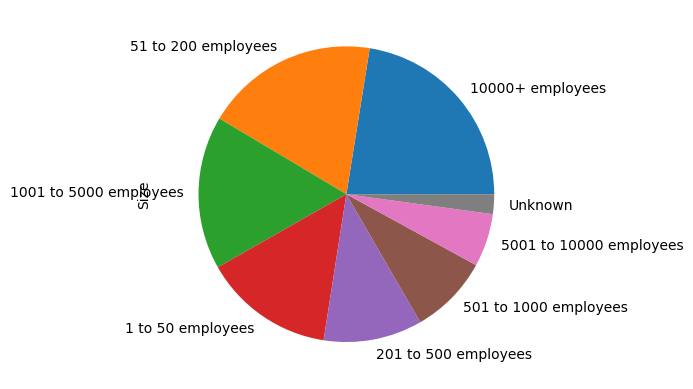

In [12]:
data['Size'].value_counts()
data['Size'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Sector'>

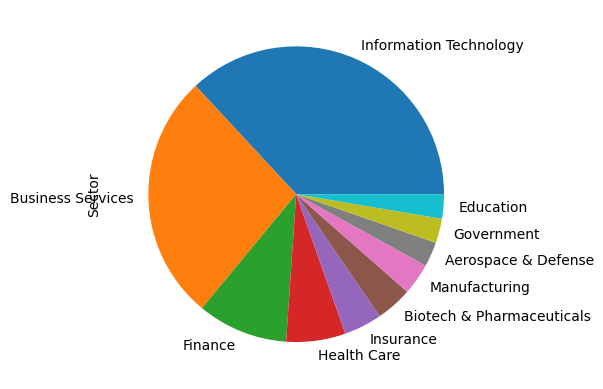

In [13]:
data['Sector'].value_counts()
data['Sector'].value_counts()[:10].plot(kind='pie')

<AxesSubplot:ylabel='Industry'>

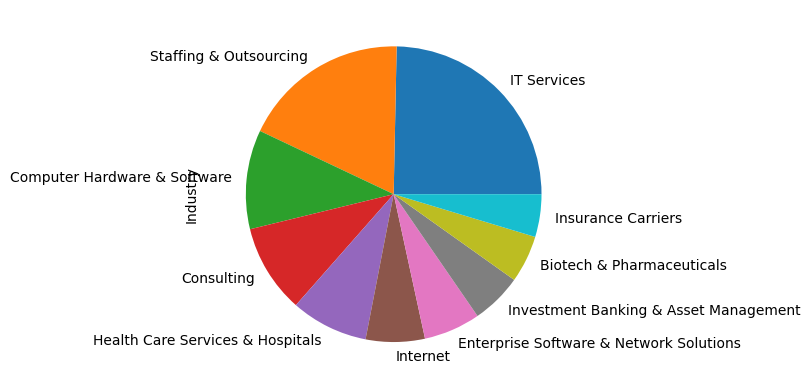

In [14]:
data['Industry'].value_counts()
data['Industry'].value_counts()[:10].plot(kind='pie')

<AxesSubplot:ylabel='Revenue'>

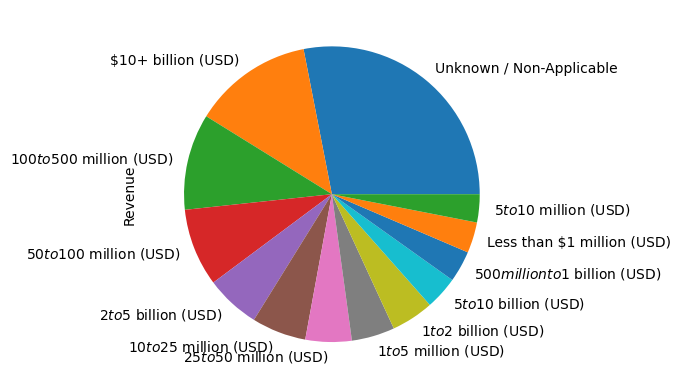

In [15]:
data['Revenue'].value_counts()
data['Revenue'].value_counts().plot(kind='pie')

In [16]:
data['Competitors'].value_counts()

Google, Microsoft, Samsung Electronics                   98
Google, Microsoft, Walmart                               96
Amazon, Accenture, Microsoft                             93
Adecco, Manpower                                         70
Robert Half, Insight Global                              57
                                                         ..
First Data, Elavon, Bank of America Merchant Services     1
Elsevier, Thomson Reuters, Google                         1
Capita, G4S, Mitie                                        1
Allstate, Nationwide, State Farm                          1
STS Aviation, Strom Aviation, Aerotek                     1
Name: Competitors, Length: 1069, dtype: int64

In [17]:
data['Salary Estimate'].value_counts()

$48K-$87K (Glassdoor est.)      95
$45K-$82K (Glassdoor est.)      92
$60K-$109K (Glassdoor est.)     92
$43K-$76K (Glassdoor est.)      91
$39K-$69K (Glassdoor est.)      91
                                ..
$69K-$119K (Glassdoor est.)      1
$114K-$134K (Glassdoor est.)     1
$68K-$114K (Glassdoor est.)      1
$41K-$74K (Glassdoor est.)       1
$59K-$72K (Glassdoor est.)       1
Name: Salary Estimate, Length: 573, dtype: int64

In [18]:
data['Founded'].value_counts()

2008.0    609
1999.0    448
2002.0    406
2000.0    365
1998.0    343
         ... 
1803.0      1
1718.0      1
1843.0      1
1846.0      1
1630.0      1
Name: Founded, Length: 217, dtype: int64

In [19]:
data['Company Name'].value_counts()

Staffigo Technical Services, LLC\n5.0               440
Diverse Lynx\n3.9                                   105
Kforce\n4.1                                         100
Apple\n4.1                                           98
Amazon\n3.9                                          96
                                                   ... 
WCI Consulting\n4.0                                   1
Business Control Systems, LP (Internal Position)      1
Kalkomey Enterprises, LLC\n4.4                        1
Academic Partnerships\n4.1                            1
Albin Engineering Services\n2.9                       1
Name: Company Name, Length: 6239, dtype: int64

In [20]:
data['Job Description'].head(5)

0    ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...
1    At Noom, we use scientifically proven methods ...
2    Decode_M\n\nhttps://www.decode-m.com/\n\nData ...
3    Sapphire Digital seeks a dynamic and driven mi...
4    Director, Data Science - (200537)\nDescription...
Name: Job Description, dtype: object

In [21]:
df = data.groupby('Job Title').count()[['Salary Estimate']]
print(df)

                                                    Salary Estimate
Job Title                                                          
!!!100% Remote!!! Sr. Data and Integration Engi...                1
"Business Analyst/ Data Analyst with experience...                1
#104252 Division Data and Financial Analyst                       1
#104293 Business Tech Support Analyst                             1
#104733 HPC Systems and Data Engineer                             2
...                                                             ...
senior data analyst                                               1
senior data systems analyst                                       1
systems Analyst 1596 (d)                                          1
{"title":"GAO Analyst (Data Analysis)","extende...                3
【1yr OPT+Intern】Data Analyst 保实习保就业                               1

[7208 rows x 1 columns]


In [22]:
df = data.groupby('Revenue').count()[['Size']]
print(df)

                                  Size
Revenue                               
$1 to $2 billion (USD)             709
$1 to $5 million (USD)             718
$10 to $25 million (USD)           906
$10+ billion (USD)                1995
$100 to $500 million (USD)        1603
$2 to $5 billion (USD)             910
$25 to $50 million (USD)           770
$5 to $10 billion (USD)            551
$5 to $10 million (USD)            468
$50 to $100 million (USD)         1296
$500 million to $1 billion (USD)   521
Less than $1 million (USD)         512
Unknown / Non-Applicable          4277


In [23]:
df = data.groupby('Size').count()[['Revenue']]
print(df)

                         Revenue
Size                            
1 to 50 employees           2180
10000+ employees            3424
1001 to 5000 employees      2557
201 to 500 employees        1645
5001 to 10000 employees      885
501 to 1000 employees       1325
51 to 200 employees         2891
Unknown                      329


### Clean **Location** feature and **Headqurater** feature by replacing some redundant values with meaningful values manually to reduce the number of unique values.

EX: in the Location feature we have a lot of values that equal to *NY* and little of values that equal to *New york state*, so why we don't replace *New york state* with *NY* since they are representing the same meaning.

note: that will help us when we'll handle the missing values in **Headqurater** feature

In [24]:
data['Location'] = data['Location'].apply(clean_location)

data['Location'] = data['Location'].replace('New Jersey','NJ')
data['Location'] = data['Location'].replace('California','CA')
data['Location'] = data['Location'].replace('Illinois','IL')
data['Location'] = data['Location'].replace('Virginia','VA')
data['Location'] = data['Location'].replace('Texas','TX')
data['Location'] = data['Location'].replace('Georgia','GA')
data['Location'] = data['Location'].replace('Arizona','AZ')
data['Location'] = data['Location'].replace('Michigan','MI')
data['Location'] = data['Location'].replace('Pennsylvania','PA')
data['Location'] = data['Location'].replace('New York State','NY')
data['Location'] = data['Location'].replace('Florida','FL')
data['Location'] = data['Location'].replace('Colorado','CO')
data['Location'] = data['Location'].replace('Connecticut','CT')
data['Location'] = data['Location'].replace('Minnesota','MN')
data['Location'] = data['Location'].replace('Maryland','MD')
data['Location'] = data['Location'].replace('Massachusetts','MA')
data['Location'] = data['Location'].replace('Oklahoma','OK')
data['Location'] = data['Location'].replace('Utah','UT')
data['Location'] = data['Location'].replace('Ontario','Canada')
data['Location'] = data['Location'].replace('Brentford, United Kingdom','UK')
data['Location'] = data['Location'].replace('Stevenage, United Kingdom','UK')
data['Location'] = data['Location'].replace('North Carolina','NC')
data['Location'] = data['Location'].replace('South Carolina','SC')
data['Location'] = data['Location'].replace('United States','USA')


data['Location'].value_counts()

TX                                        4149
CA                                        3649
NY                                        1219
IL                                        1106
PA                                         977
AZ                                         967
FL                                         838
NJ                                         377
OH                                         296
VA                                         263
NC                                         240
MA                                         227
MD                                         198
DC                                         196
GA                                         170
CO                                         151
WA                                         144
MO                                         121
MN                                          90
USA                                         85
WI                                          80
DE           

In [25]:
data['Headquarters'] = data['Headquarters'].apply(clean_headqurater)

data['Headquarters'].value_counts()[0:100]

CA                             3157
TX                             1580
NY                             1382
IL                             1252
NJ                              908
VA                              862
PA                              532
FL                              519
GA                              413
MA                              360
AZ                              301
MD                              298
MI                              291
IN                              248
OH                              247
WA                              245
UK                              244
DC                              205
MO                              175
NC                              168
MN                              120
TN                              109
JP                              109
Canada                          102
WI                               96
CO                               96
CT                               94
DE                          

## Data quality check

### 1. Handling duplicated values.
    1. Check the number of consistant duplicated values in the dataset.
    2. Drop consistant duplicated values from the dataset.
    3. report findings
    

### 2. Handling missing values.

    1. Check the number missing values at each feature.
    2. plot the required graphs.
    3. Check if there are features have the same pattern in missing values.
    4. Determine the mechanism of missing values for each feature.
    5. Handle the missing values based on that mechanism.
    6. report findings


### 3. Handling the outliers in each numeric feature.
    1. plot the boxplot for each numeric feature.
    2. determine the number of outliers at each feature.
    3. remove the outliers from each numeric feature.

### Handling consistant duplicated values.

In [26]:
print(f"There are {data.duplicated().sum()} consistant duplicated values.")
data = data.drop_duplicates()
data.reset_index(drop=True, inplace=True)

print(f"There are {data.duplicated().sum()} consistant duplicated values now.")

There are 26 consistant duplicated values.
There are 0 consistant duplicated values now.


### Start checking and handling the missing values in this dataset.

In [27]:
if data.isna().values.any() == True:
    #this condidtion will be evaluated.
    print("There are missing values in this dataframe")
else:
    print("There aren't missing values in this dataframe")
total_miss = data.isnull().sum()
percent_miss = (total_miss/data.isnull().count()*100)

# sort attributes by missing value ratio
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})
missing_data.sort_values(by='Total missing',ascending=False)

There are missing values in this dataframe


,Total missing,% missing
Easy Apply,15528,96.243957
Competitors,11807,73.180860
Founded,4243,26.298500
Industry,2287,14.175034
Sector,2284,14.156440
Rating,1594,9.879757
Headquarters,967,5.993554
Size,923,5.720838
Type of ownership,923,5.720838
Revenue,923,5.720838


<AxesSubplot:>

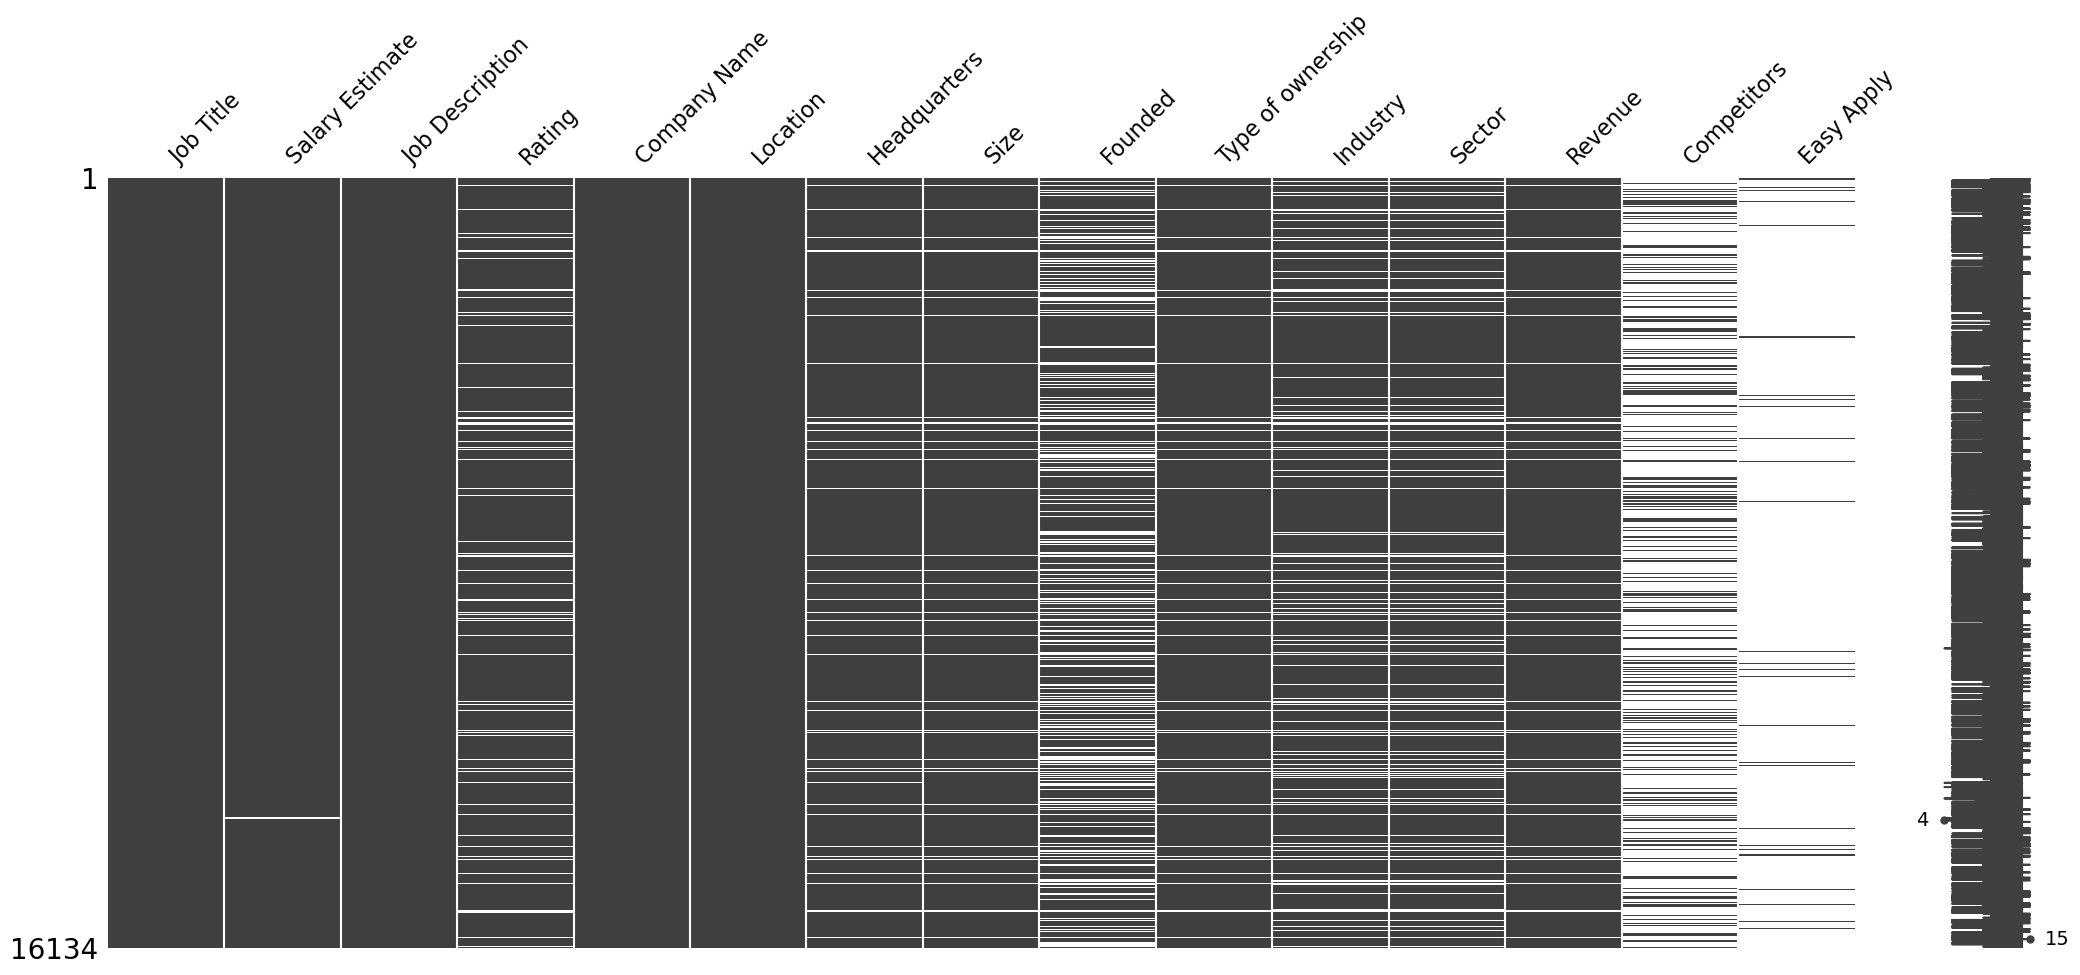

In [28]:
missingno.matrix(data)

<AxesSubplot:>

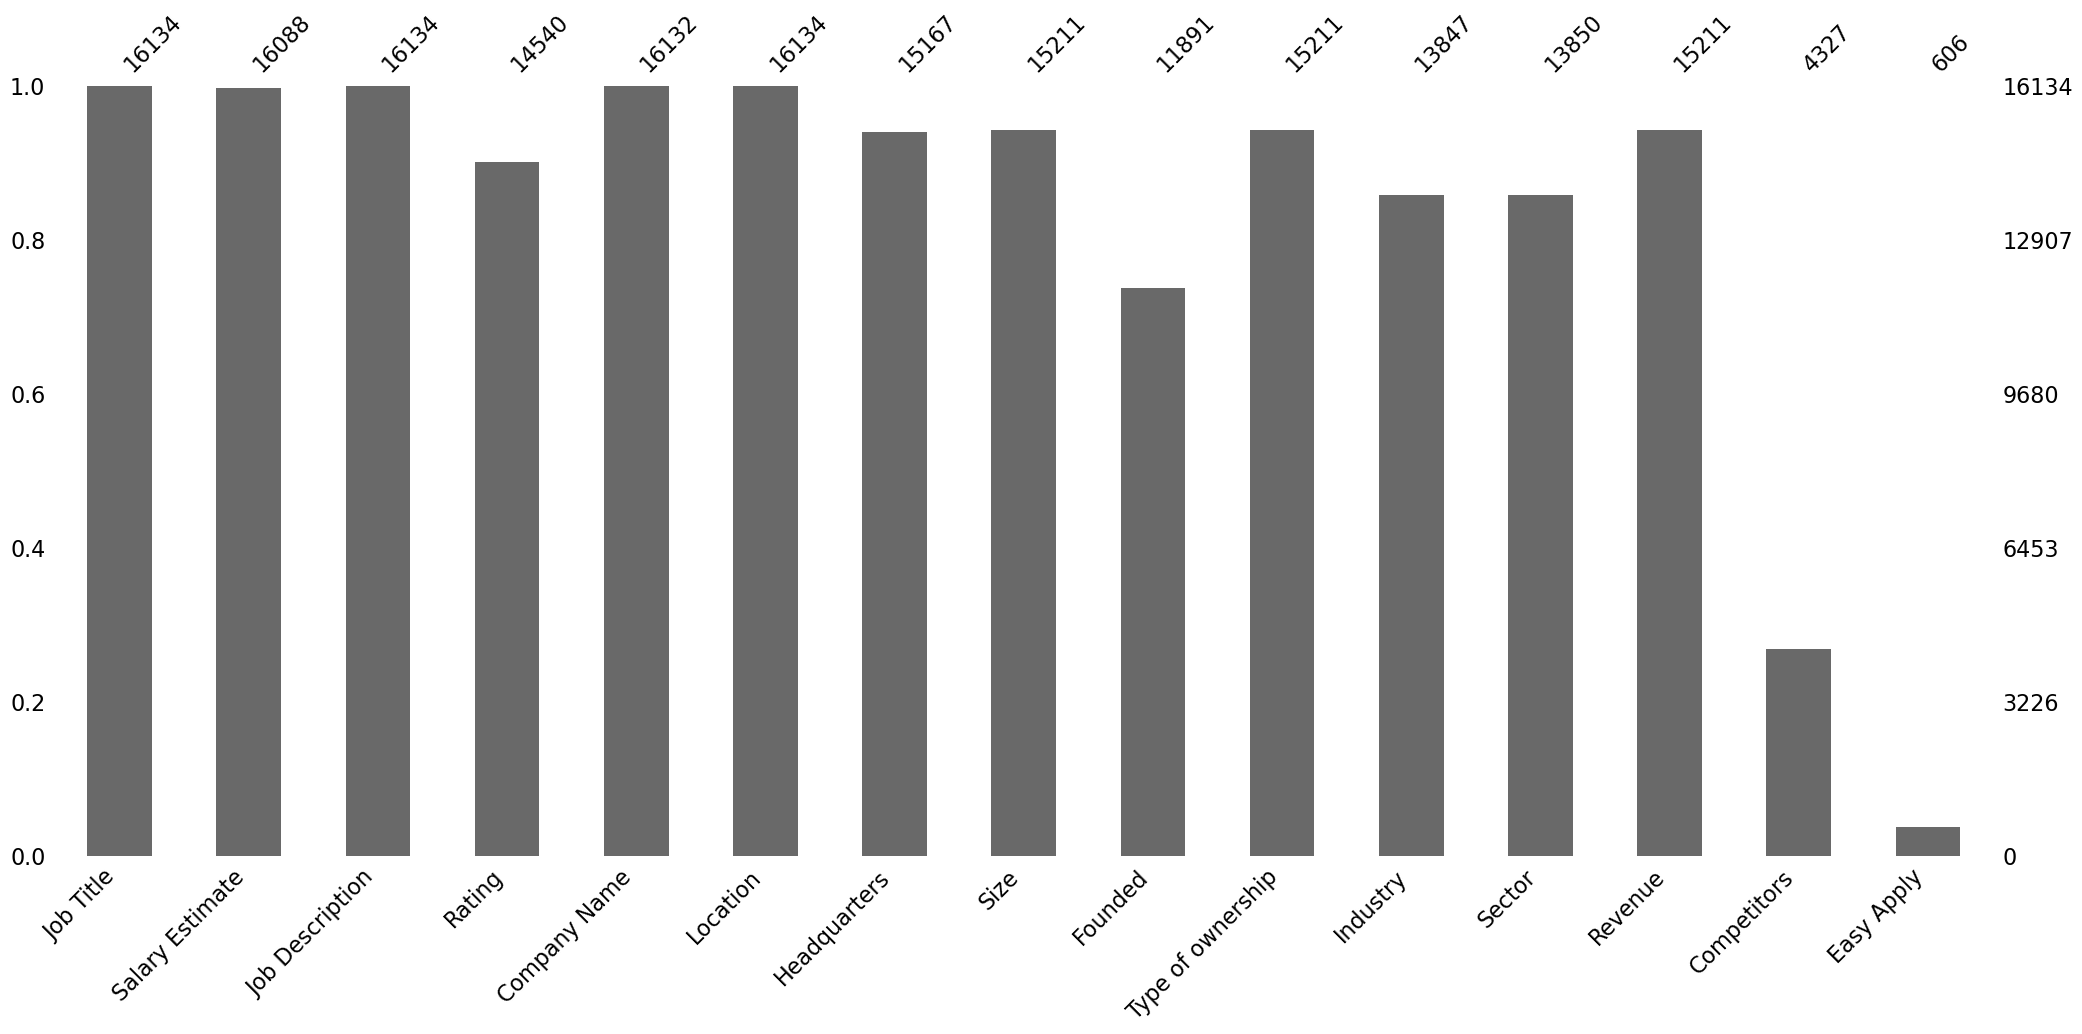

In [29]:
missingno.bar(data)

<AxesSubplot:>

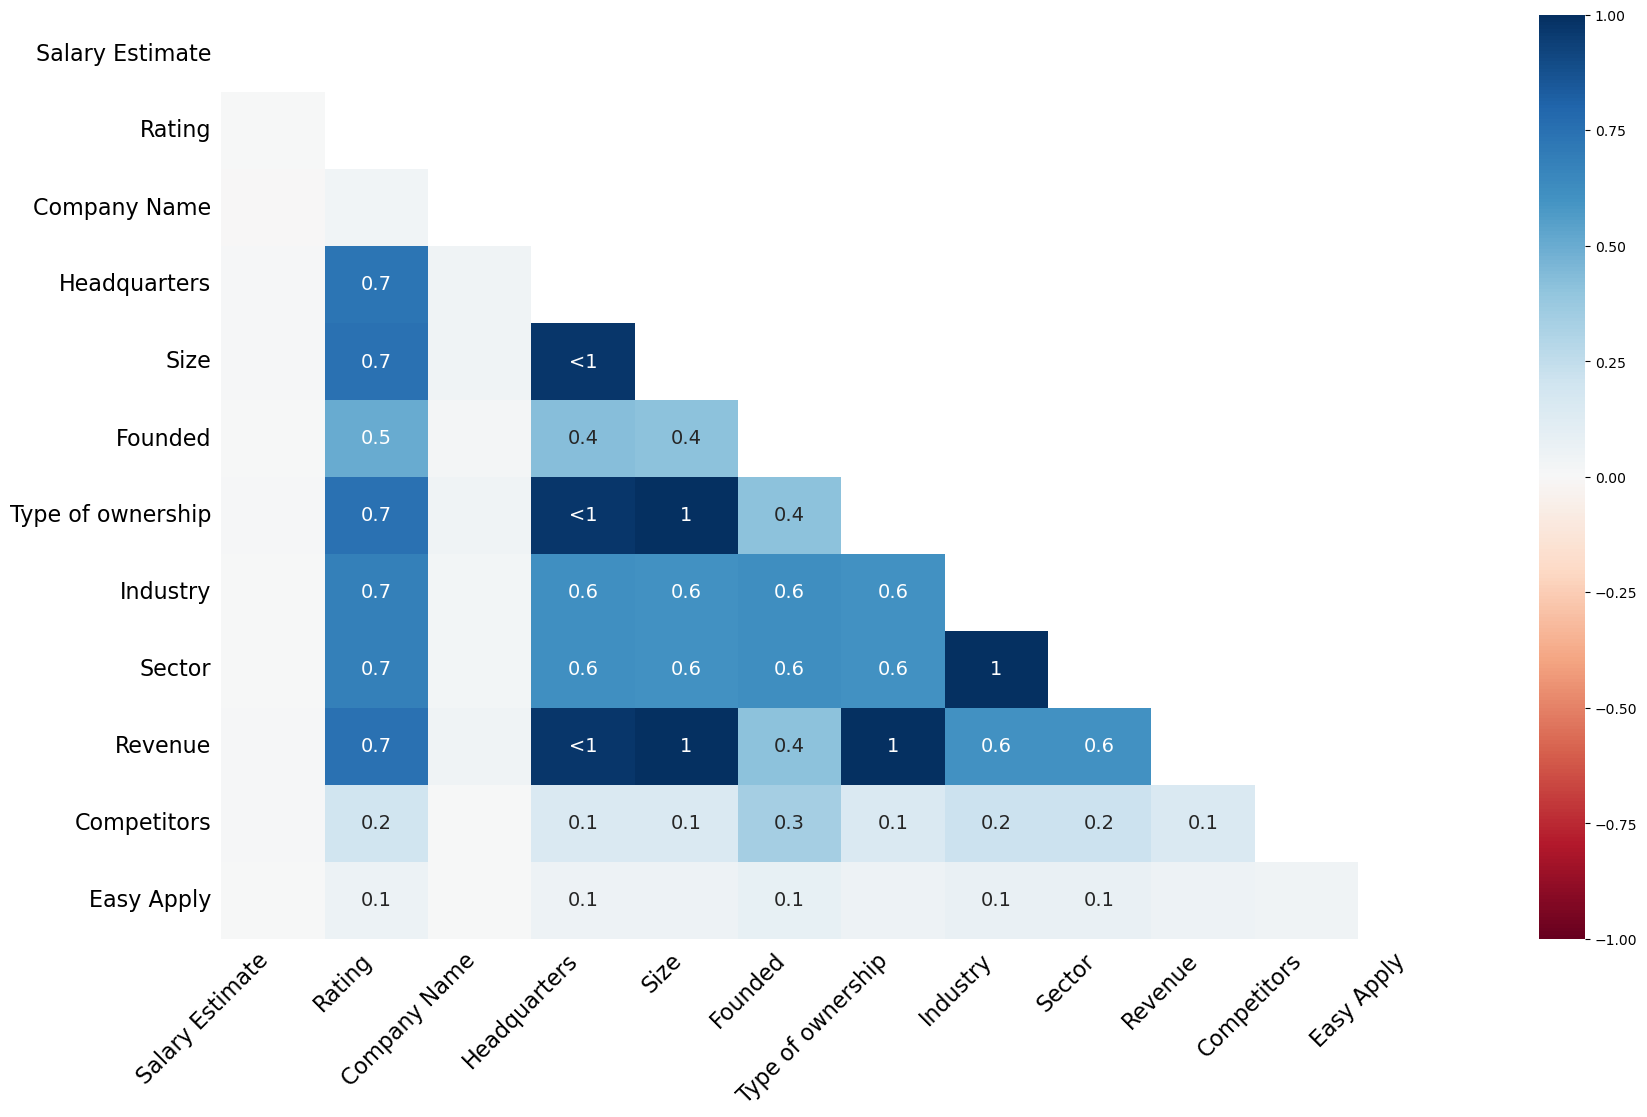

In [30]:
missingno.heatmap(data)

### Findings from above graphs.<br>

**Size** feature, **Type of ownership** feature, **Revenue** and **Headquarters** feature have the same patterns in missing values<br>
**Industry** feature, **Sector** feature feature have the same patterns in missing values.

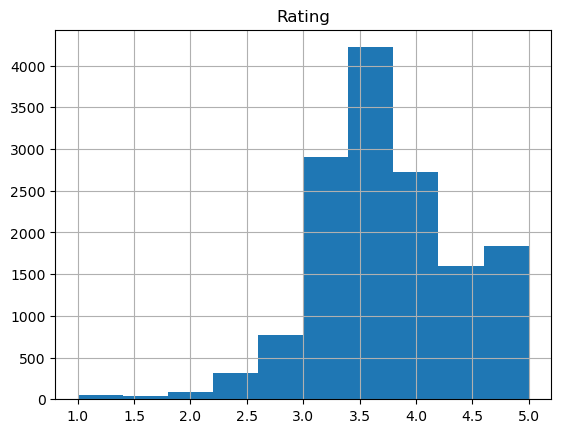

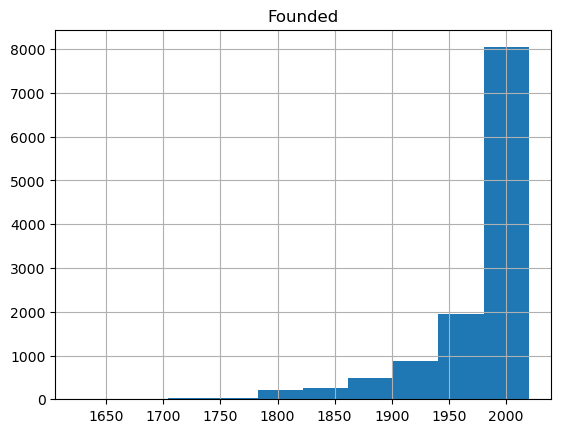

In [31]:
for column in data.columns:
    if data[column].dtype != object and data[column].isna().values.any() == True:
        fig = plt.figure(figsize=(10,10))
        #sns.displot(df[column], kind="hist")
        data.hist(column)
        plt.close(fig)

I assumed that Easy Apply feature has only binary data and the null values happens when the value tented to be **Flase** so it's following **MNAR** approach.<br>

Although there's no value between 1700 and 1650 in the **Founded** feature I can't assume the missing values happened in this period of time because there are a lot of missing values and I believe that the number of companies was not that much in the sixtieth late so I'll say it follow **MCAR** mechanism.<br>

I can't assume any assumtion about the **Rating** feature, **Salary Estimate** feature, **Competitors** feature and **Company Name** feature since it doesn't follow any pattern so I'll say it follows **MCAR** mechanism.


### I found that I better handel the features that follows **MCAR** and **MNAR** mechansim first and then I'll analyiz the mechanisms of the features that have same patterns.

In [32]:
#only 46 values so I'll drop them
data = data.dropna(axis='rows',subset=['Salary Estimate'])
data.reset_index(drop=True, inplace=True)
#remove per hour salary estimate because I considered them as noise since the salary estimate is per year
print(data['Salary Estimate'].str.count("Per Hour").sum())
data = data[data["Salary Estimate"].str.contains("Per Hour")==False]
data.reset_index(drop=True, inplace=True)

34


In [33]:
# 9.876238% of the feature is missing and since it's numeric feature so I found that I shoud fill the missing values with its mean
data['Rating'] = data['Rating'].fillna(data.groupby('Salary Estimate')['Rating'].transform('median'))
#When Salary Estimate = 42𝐾− 63K (Glassdoor est.) Rating value become NaN so I will fill the remain 4 NaN with the mean of all Rating.
data['Rating'] = data['Rating'].fillna(data['Rating'].mean() ,axis='rows')

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

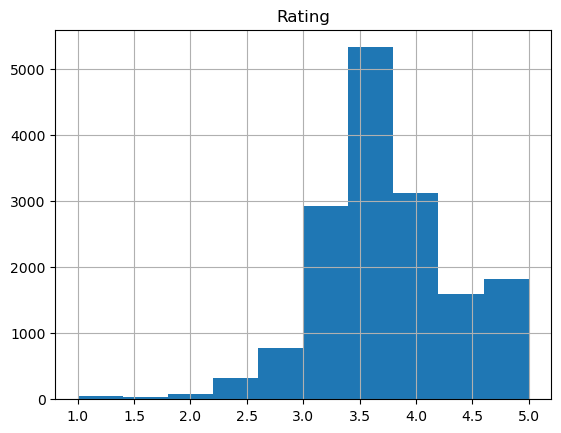

In [34]:
#Plot the histogram of the Rating feature after clean it
data.hist('Rating')

In [35]:
#73.168317% is null and it doesn't follow any pattern so I found this feature.
data = data.drop(['Competitors'],axis=1)

In [36]:
#0.012376% and only 2 values in the companny name and we can't assum the value of the company name so I'll drop them.
data = data.dropna(axis='rows',subset=['Company Name'])
data.reset_index(drop=True, inplace=True)

In [37]:
#I assumed the another value with TRUE is FALSE.
data['Easy Apply'] = data['Easy Apply'].fillna('FALSE' ,axis='rows')

<AxesSubplot:>

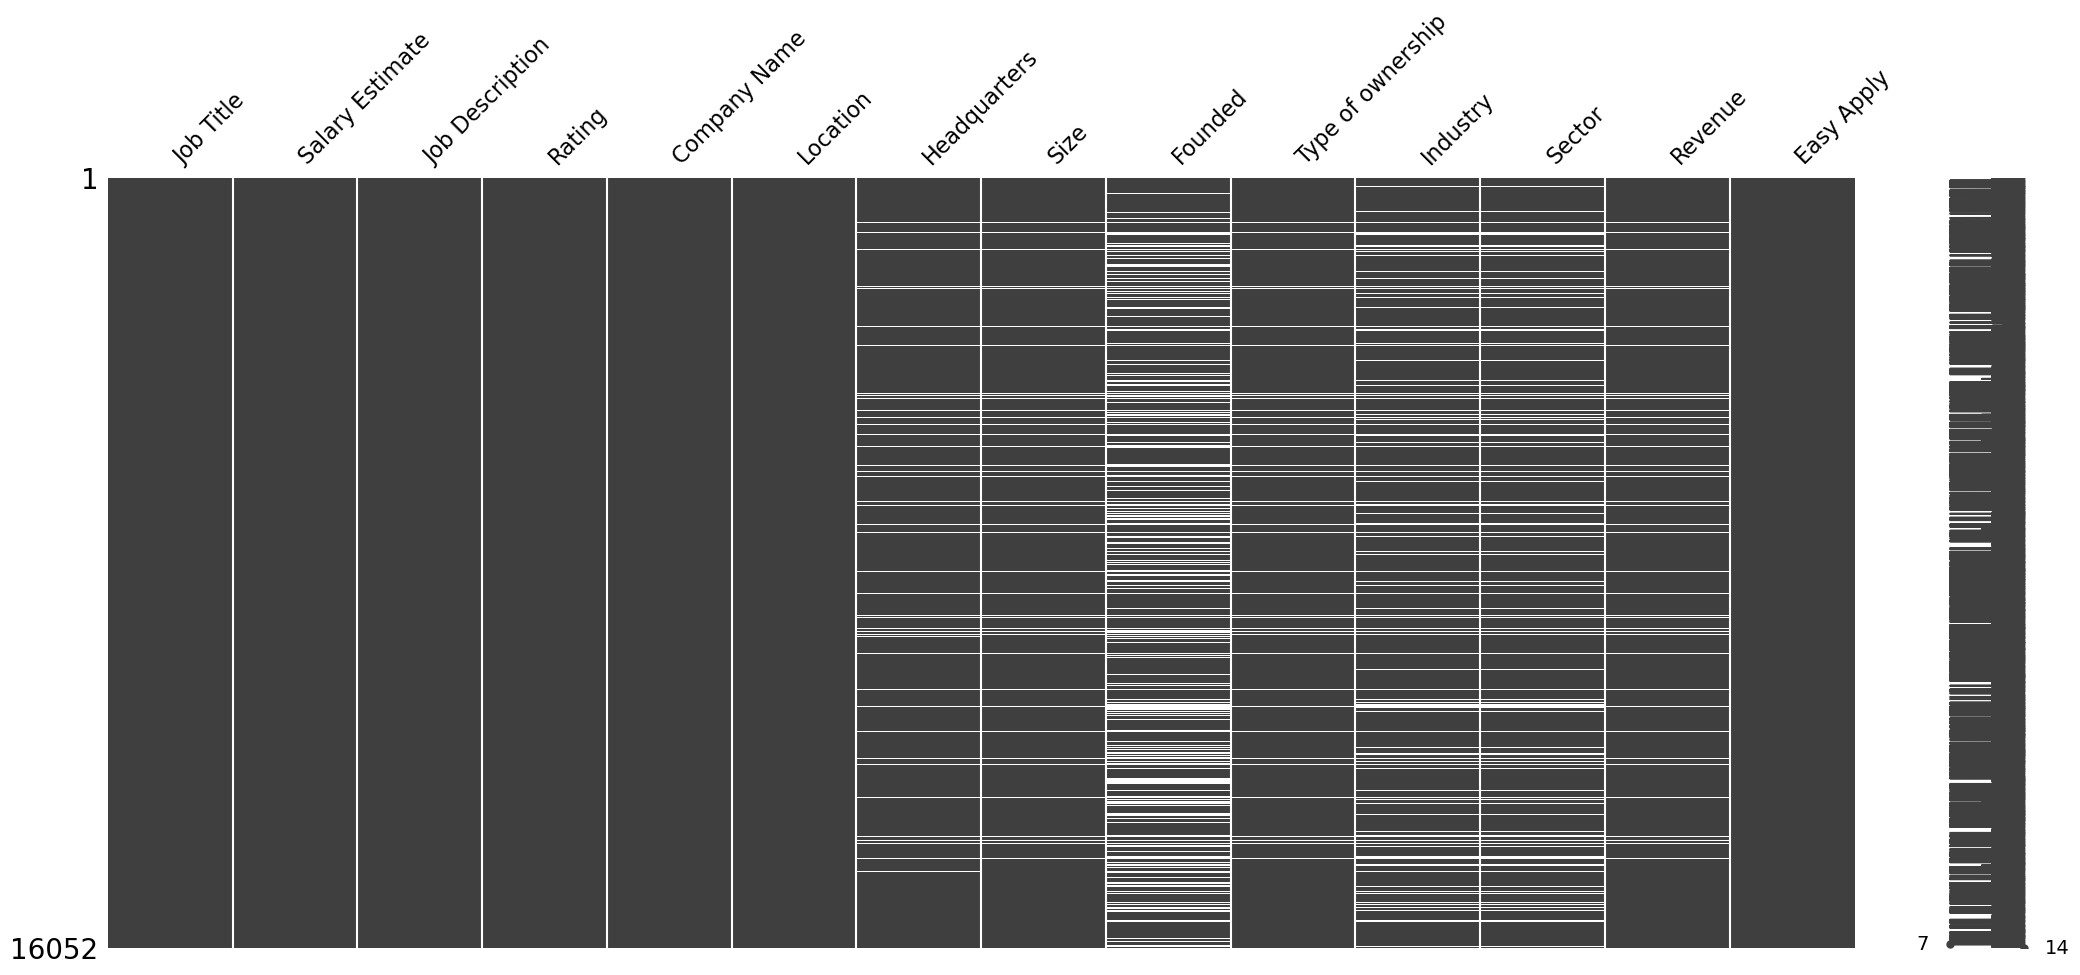

In [38]:
missingno.matrix(data)

### Analyzing the missing values mechanisms of the features that have the same patterns.

In [39]:
#you can change the value of Revenue with Size, Type of ownership or Headquarters since they are follow the same patterns. 

#check how many missing values in Revenue, Size, Type of ownership or Headquarters at each location value
analysis_1 = pd.DataFrame.from_dict(Counter(data['Location'].loc[data['Revenue'].isna()]), orient='index', columns = ['number of missings']).reset_index().sort_values('number of missings',ascending =False)
analysis_1.rename(columns={'index': 'Location'}, inplace = True)

#check how many missing values in Revenue, Size, Type of ownership or Headquarters at each Salary Estimate value
analysis_2 = pd.DataFrame.from_dict(Counter(data['Salary Estimate'].loc[data['Revenue'].isna()]), orient='index', columns = ['number of missings']).reset_index().sort_values('number of missings',ascending =False)[:30]
analysis_2.rename(columns={'index': 'Salary Estimate'}, inplace = True)

#check how many missing values in Revenue, Size, Type of ownership or Headquarters at each Company Name value
analysis_3 = pd.DataFrame.from_dict(Counter(data['Company Name'].loc[data['Revenue'].isna()]), orient='index', columns = ['number of missings']).reset_index().sort_values('number of missings',ascending =False)[:30]
analysis_3.rename(columns={'index': 'Company Name'}, inplace = True)

#check how many missing values in Revenue, Size, Type of ownership or Headquarters at each Easy Apply value
analysis_4 = pd.DataFrame.from_dict(Counter(data['Easy Apply'].loc[data['Revenue'].isna()]), orient='index', columns = ['number of missings']).reset_index().sort_values('number of missings',ascending =False)
analysis_4.rename(columns={'index': 'Easy Apply'}, inplace = True)

analysis_1_styler = analysis_1.style.set_table_attributes("style=display:inline;margin:5px").set_caption('number of missings at each Location value')
analysis_2_styler = analysis_2.style.set_table_attributes("style=display:inline;margin:5px").set_caption('number of missings at each Salary Estimate value')
analysis_3_styler = analysis_3.style.set_table_attributes("style=display:inline;margin:5px").set_caption('number of missings at each Company Name value')
analysis_4_styler = analysis_4.style.set_table_attributes("style=display:inline;margin:5px").set_caption('number of missings at each Easy Apply value')

display_html(analysis_1_styler._repr_html_()+analysis_2_styler._repr_html_()+analysis_3_styler._repr_html_()+analysis_4_styler._repr_html_(), raw=True)

,Location,number of missings
3,TX,231
1,CA,204
4,AZ,71
0,NY,70
2,IL,52
7,FL,51
5,PA,47
6,NJ,22
11,VA,16
12,NC,16


#### From the above table we see that the most of missing values in the the **Revenue** feature happens when the value of the **Easy Apply** feature is only **FALSE** so I think the missing values in the **Revenue** feature happened when the **Easy Apply** value was **FALSE** so the missing value mechanism in the **Revenue** feature is **MAR** mechanism, and since the **Size** feature, **Type of ownership** feature, and **Headquarters** features also follow the same pattern with **Revenue** feature so it also follows the **MAR** mechanism in missing values.

In [40]:
#You can replace Industry feature in this analysis with Sector feature since they are follow the same pattern

#check how many missing values in Industry, or Sector at each location value
analysis_5 = pd.DataFrame.from_dict(Counter(data['Location'].loc[data['Industry'].isna()]), orient='index', columns = ['number of missings']).reset_index().sort_values('number of missings',ascending =False)
analysis_5.rename(columns={'index': 'Location'}, inplace = True)

#check how many missing values in Industry, or Sector at each Salary Estimate value
analysis_6 = pd.DataFrame.from_dict(Counter(data['Salary Estimate'].loc[data['Industry'].isna()]), orient='index', columns = ['number of missings']).reset_index().sort_values('number of missings',ascending =False)[:30]
analysis_6.rename(columns={'index': 'Salary Estimate'}, inplace = True)

#check how many missing values in Industry, or Sector at each Company Name value
analysis_7 = pd.DataFrame.from_dict(Counter(data['Company Name'].loc[data['Industry'].isna()]), orient='index', columns = ['number of missings']).reset_index().sort_values('number of missings',ascending =False)[:30]
analysis_7.rename(columns={'index': 'Company Name'}, inplace = True)

#check how many missing values in Industry, or Sector at each Easy Apply value
analysis_8 = pd.DataFrame.from_dict(Counter(data['Easy Apply'].loc[data['Industry'].isna()]), orient='index', columns = ['number of missings']).reset_index().sort_values('number of missings',ascending =False)
analysis_8.rename(columns={'index': 'Easy Apply'}, inplace = True)

analysis_5_styler = analysis_5.style.set_table_attributes("style=display:inline;margin:5px").set_caption('number of missings at each Location value')
analysis_6_styler = analysis_6.style.set_table_attributes("style=display:inline;margin:5px").set_caption('number of missings at each Salary Estimate value')
analysis_7_styler = analysis_7.style.set_table_attributes("style=display:inline;margin:5px").set_caption('number of missings at each Company Name value')
analysis_8_styler = analysis_8.style.set_table_attributes("style=display:inline;margin:5px").set_caption('number of missings at each Easy Apply value')

display_html(analysis_5_styler._repr_html_()+analysis_6_styler._repr_html_()+analysis_7_styler._repr_html_()+analysis_8_styler._repr_html_(), raw=True)

,Location,number of missings
4,TX,577
2,CA,516
0,NY,197
5,AZ,135
3,IL,134
7,FL,120
6,PA,115
1,NJ,57
11,VA,47
8,OH,44


#### From the above table we see that the most of missing values in the the **Industry** feature happens when the value of the **Easy Apply** is **FALSE** so I think the missing values in the **Industry** feature happened when the **Easy Apply** values was **FALSE** so the missing value mechanism in the **Industry** feature is **MAR** mechanism and since the **Sector** feature also follow the same pattern with **Industry** feature so **Sector** feature also follows the **MAR** mechanism in missing values.

Note: above analysis isn't accurate 100% because when there are *7* values in **Easy apply** feature is TRUE and they have null values in **Indusrty** and **Sector** feature So the mechanism maybe **MCAR**.

### Handle Headquarters feature


I Checked the equality precentage between two features then I decided to replace the null values in Headquarter feature with the location value.

In [41]:
counter = 0
data = data.reset_index(drop = True)
for i in range(len(data)):
     if data.loc[i,'Location'] == data.loc[i,'Headquarters']:
        counter = counter + 1
     else:  
        counter = counter
        
equality_precentage = counter / len(data) * 100
print(equality_precentage)
for i in range(len(data)):
     if not isinstance(data.loc[i,'Headquarters'],str):
        data.loc[i,'Headquarters'] = data.loc[i,'Location']
     else:  
        continue

39.96386743084974


### Handle missings in Size and Type of ownership feature

There's a value in **Size** and Type of ownership features called **Unknown** and it's obvious that it's the best value to replace the **null** values with it.

In [42]:
data[['Size','Type of ownership']]= data[['Size','Type of ownership']].fillna('Unknown')

### Handle **Revenue** feature

The best choice here is to replace the missings here the most frequented value which is also represents the meaninig of **NaN**.

In [43]:
data['Revenue'] = data['Revenue'].fillna(data['Revenue'].mode()[0])

### Start handling the **Industry** and **Sector** features

The best choice here for these object features is to replace null values with most frequented value.

In [44]:
data['Industry'] = data['Industry'].fillna(data['Industry'].mode()[0])
data['Sector'] = data['Sector'].fillna(data['Sector'].mode()[0])

### Start Handling the **Founded** feature

I see that I should replace the nan value with the median of each group in size feature.

Ex: **more than 1 billion** it's a value in the **Size** feature and it has some **Founded** values and at the same time it has **NaN** values so I took the median of the Founded values and I replaced the nan values with this median.

In [45]:
data['Founded'] = data['Founded'].fillna(data.groupby('Size')['Founded'].transform('median'))
df  = data.groupby('Size').median()[['Founded']]
print(data['Founded'].value_counts())
df

2010.0    1602
1980.0    1285
2007.0    1010
2002.0     817
2008.0     603
          ... 
1698.0       1
1807.0       1
1822.0       1
1846.0       1
1766.0       1
Name: Founded, Length: 216, dtype: int64


,Founded
Size,
1 to 50 employees,2010.0
10000+ employees,1961.0
1001 to 5000 employees,1995.0
201 to 500 employees,2002.0
5001 to 10000 employees,1983.0
501 to 1000 employees,2002.0
51 to 200 employees,2007.0
Unknown,1980.0


### Check if there are missing values.

<AxesSubplot:>

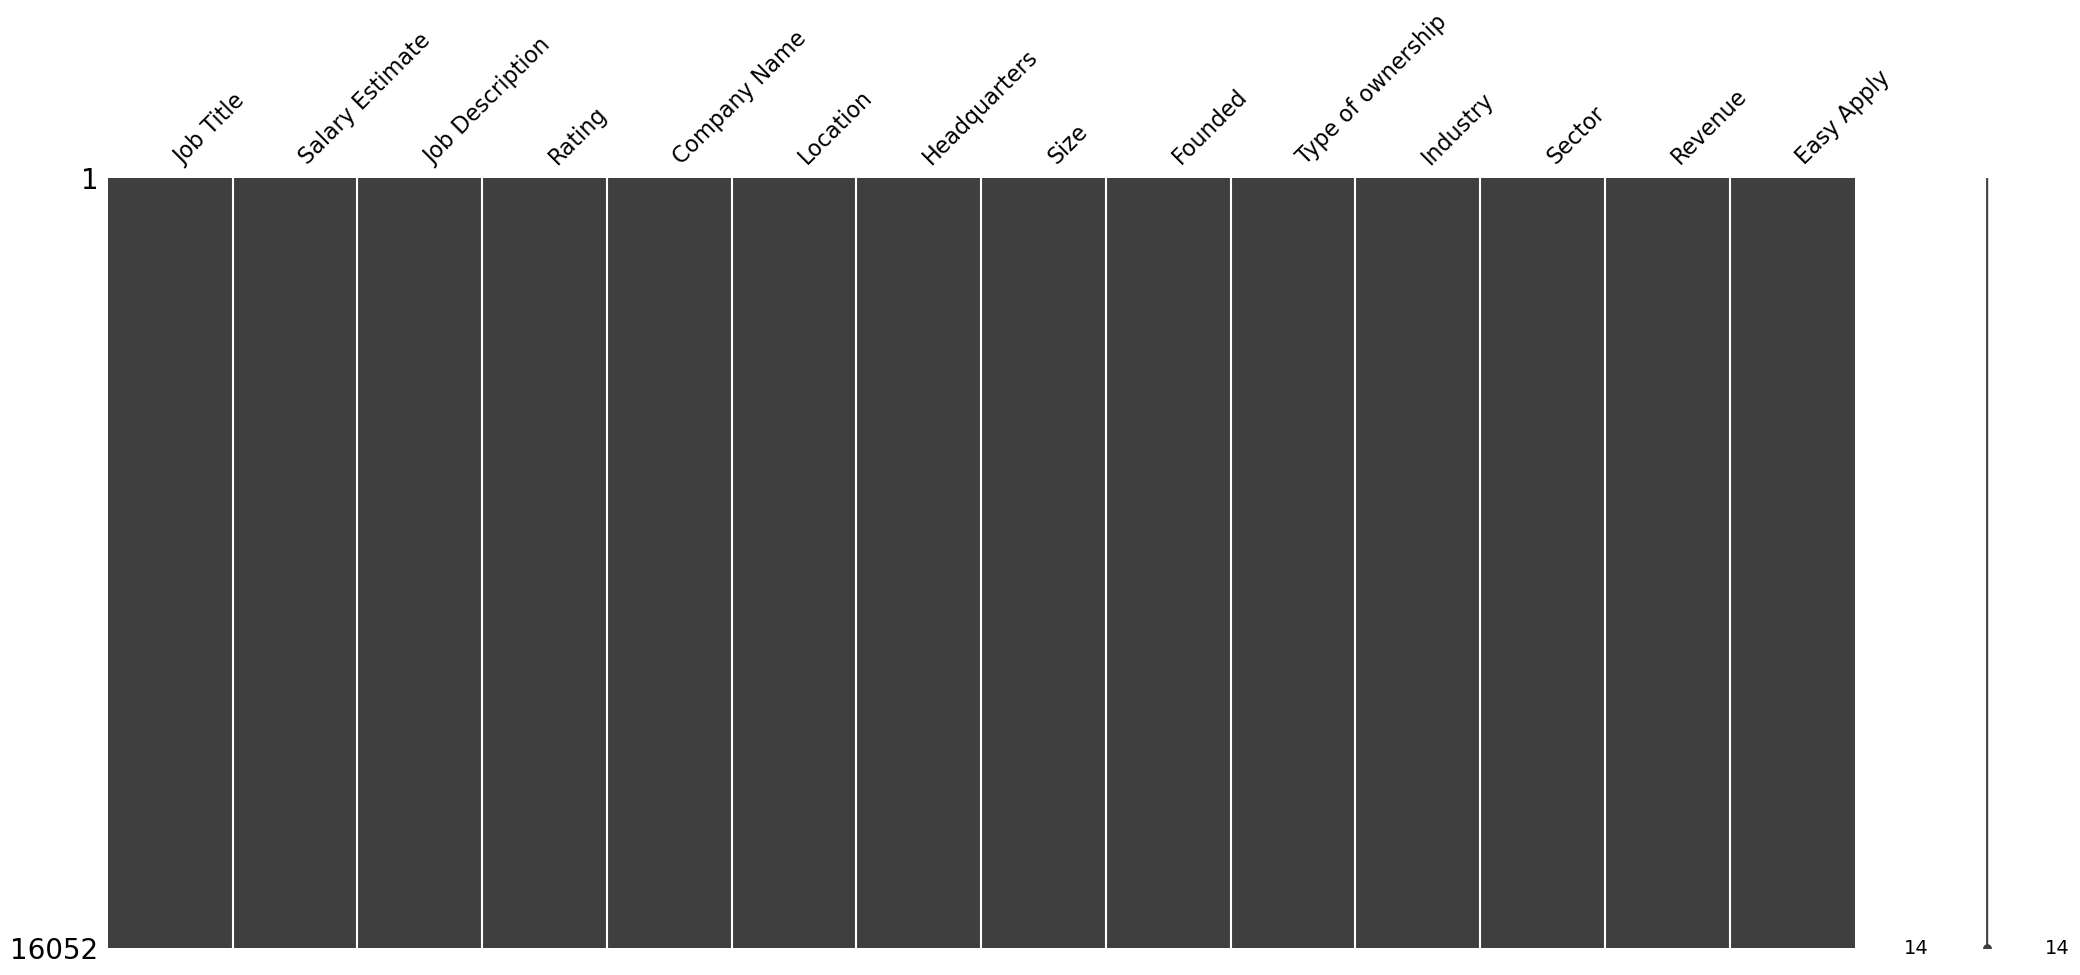

In [46]:
missingno.matrix(data)

### Handle Salary Estimate feature and produce numeric features from it that have more meaning.

From Salary Estimate feature I generated min_salary and max_salary and Average_salary which is equal the difference between max_salary and min_salary at each row. 

In [47]:
data['min_salary'] = data['Salary Estimate'].apply(create_min_salary)
data['max_salary'] = data['Salary Estimate'].apply(create_max_salary)
data = data.drop(['Salary Estimate'],axis=1)

In [48]:
data['Average_salary'] = (data['max_salary'] + data['min_salary']) / 2
data['Average_salary'].value_counts()

61000.0     281
63500.0     247
92500.0     233
68500.0     232
60500.0     225
           ... 
96000.0       7
52000.0       7
33000.0       7
149500.0      7
95000.0       3
Name: Average_salary, Length: 222, dtype: int64

### Do some analysis about these new numerical features

#### Check the Average salary and the number of companies at each location.

In [49]:
df = data.groupby(['Location'])[['Average_salary']]
df = df.first()
df_count = data.groupby(['Location']).count()[['Average_salary']]
df['Number of companies'] = df_count
df = df.reset_index(level=0)
df_1 = df.sort_values('Average_salary', ascending =False).reset_index(drop=True)
df_1

df_2 = df.sort_values('Number of companies', ascending =False).reset_index(drop=True)
df_2

df1_styler = df_1.style.set_table_attributes("style=display:inline;margin:50px").set_caption('Sorted by the average salary')
df2_styler = df_2.style.set_table_attributes("style=display:inline;margin:150px").set_caption('Sorted by the number of companies in each location')

#Do the Average_salary increase when the Number of companies increase also?
print(f"Correlation between Average salary and the number of companies at each location {df_1['Average_salary'].corr(df_2['Number of companies'])}")
                             
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)



Correlation between Average salary and the number of companies at each location 0.748069880054444


,Location,Average_salary,Number of companies
0,NY,146000.000000,1219
1,NJ,146000.000000,371
2,CA,133000.000000,3619
3,TX,132500.000000,4118
4,OH,131500.000000,296
5,AZ,122500.000000,966
6,DE,122000.000000,78
7,PA,122000.000000,974
8,OR,112000.000000,45
9,MS,92500.000000,1


### Plot the Average salary at each location and number of companies at each location.

Text(0.5, 1.0, 'Number of companies in each location')

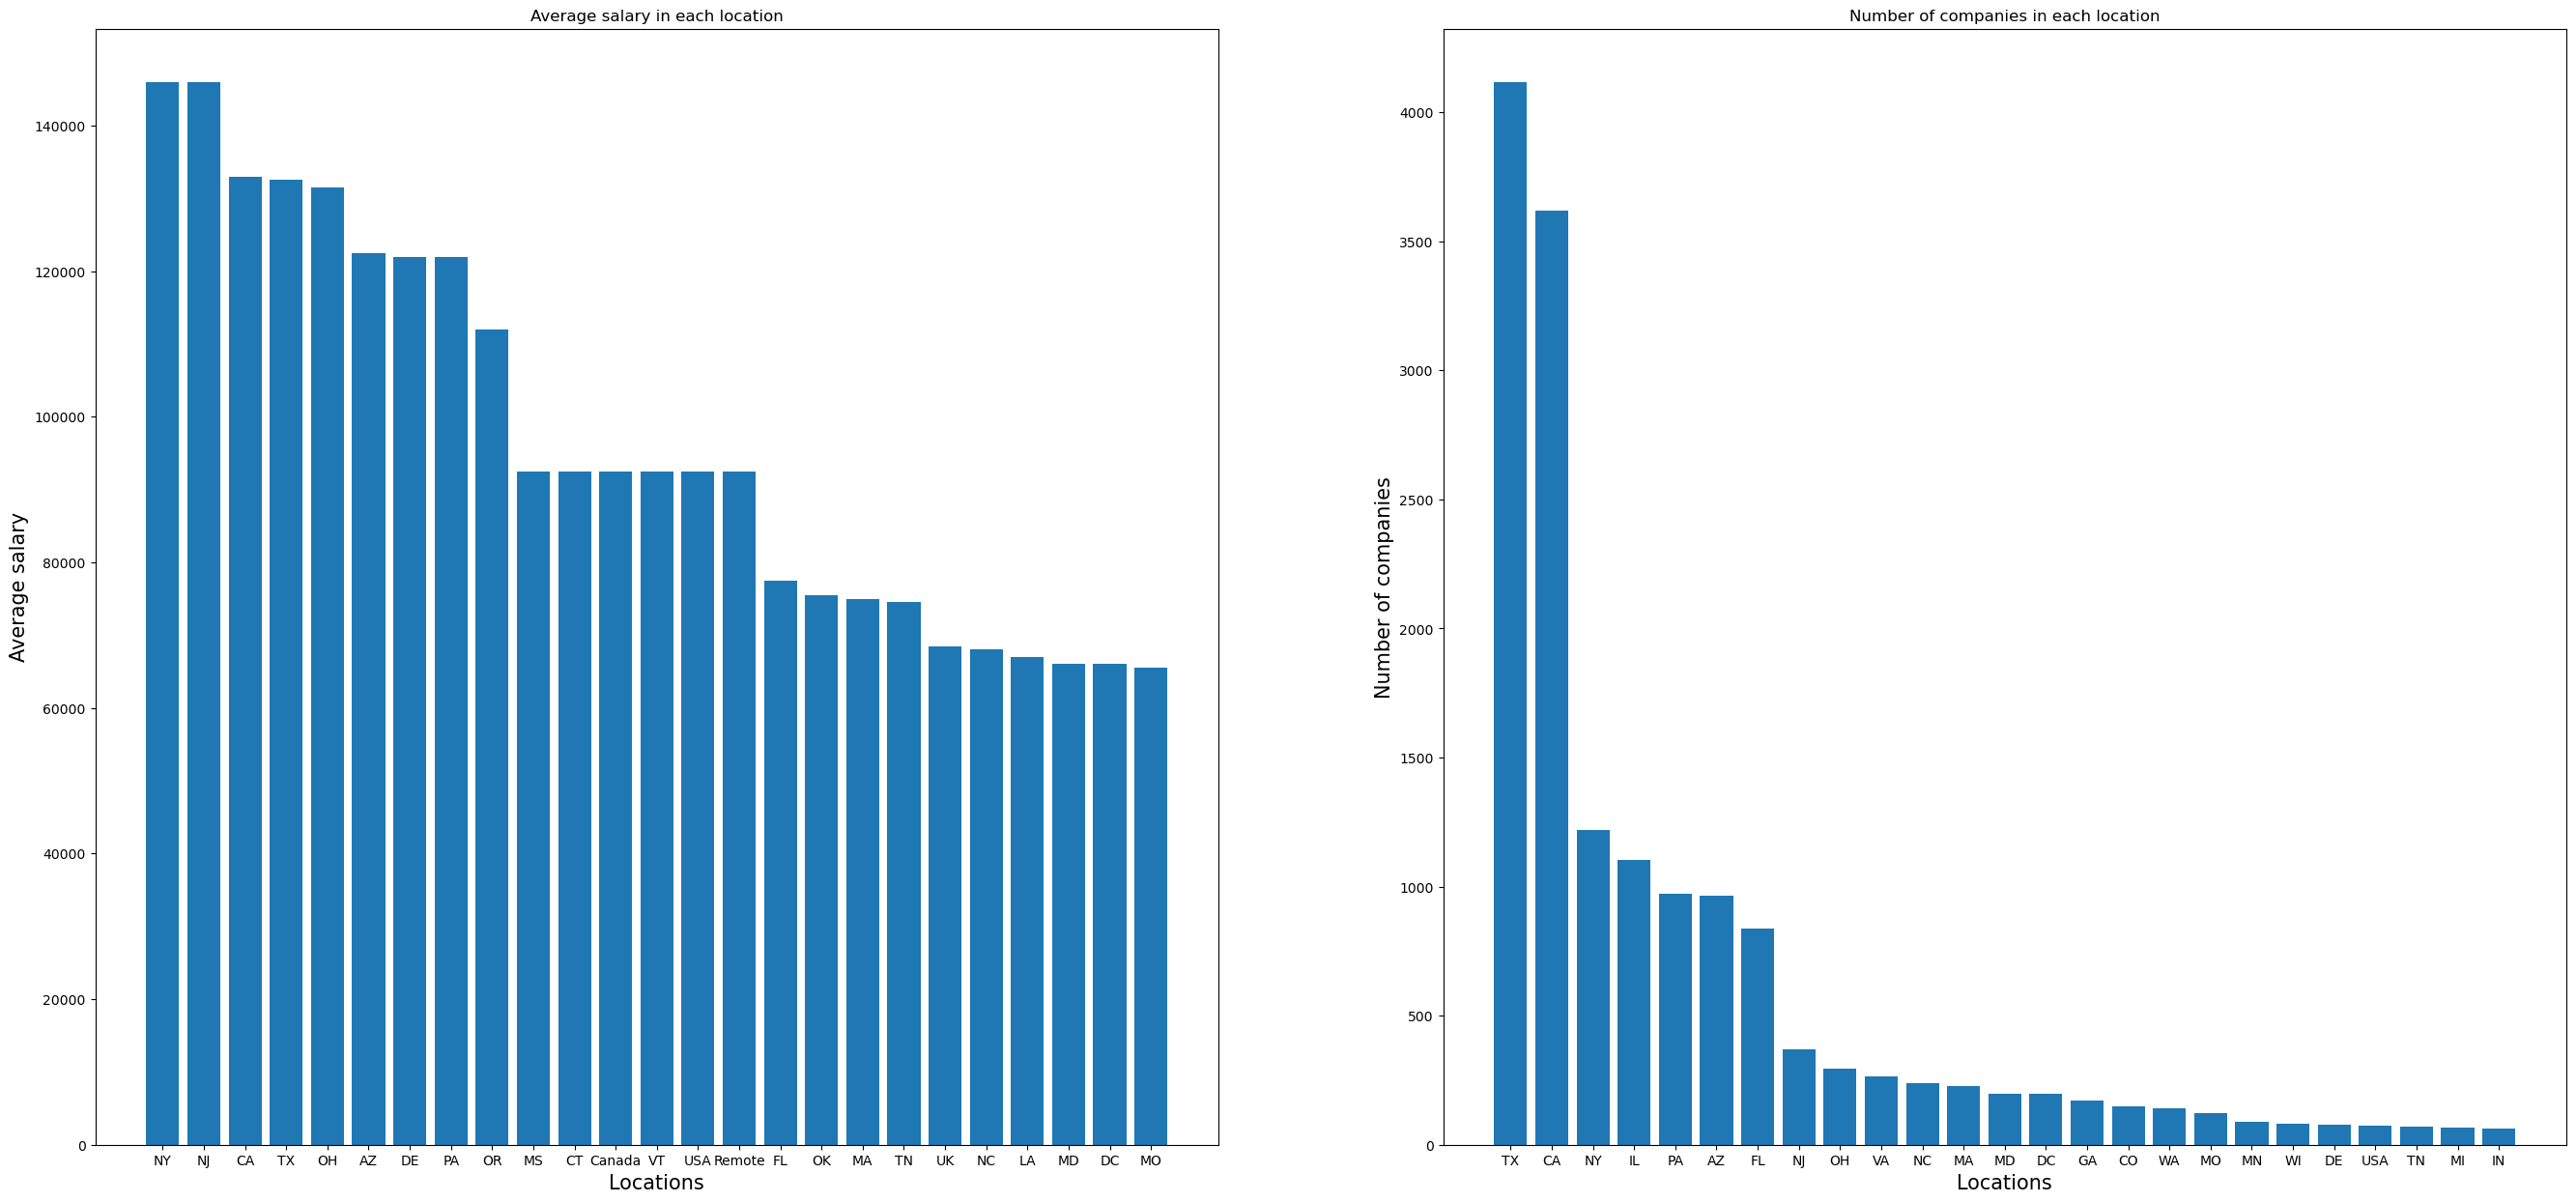

In [50]:
fig , axs = plt.subplots(1,2,figsize=(33,15))
axs[0].bar(df_1['Location'][0:25],df_1['Average_salary'][0:25])
axs[0].set_xlabel("Locations", fontsize=15)
axs[0].set_ylabel("Average salary" , fontsize=15)
axs[0].set_title("Average salary in each location")
axs[1].bar(df_2['Location'][0:25],df_2['Number of companies'][0:25])
axs[1].set_xlabel('Locations', fontsize=15)
axs[1].set_ylabel('Number of companies', fontsize=15)
axs[1].set_title("Number of companies in each location")

### From what we see here the number of companies in each location doesn't have that high correlation with average salary.

### Analysis the average maximum and average minimum salary at each loaction.

In [51]:
df_3 = data.groupby(['Location']).mean()[['min_salary']]


df_3 = df_3.reset_index(level=0)

df_3['avg min salary'] = df_3['min_salary']  

df_3 = df_3.drop(['min_salary'],axis=1)
df_3 = df_3.sort_values('avg min salary', ascending =False).reset_index(drop=True)


df_4 = data.groupby(['Location']).mean()[['max_salary']]

df_4 = df_4.reset_index(level=0)

df_4['avg max salary'] = df_4['max_salary'] 
df_4 = df_4.drop(['max_salary'],axis=1)

df_4 = df_4.sort_values('avg max salary', ascending =False).reset_index(drop=True)

df3_styler = df_3.style.set_table_attributes("style=display:inline;margin:100px").set_caption('Sorted by the average of minimum salaries in each location')
df4_styler = df_4.style.set_table_attributes("style=display:inline;margin:300px").set_caption('Sorted by the average of maximum salaries in each location')
print(f"Correlation between Average minimum salaries and and average maximum salaries in each location is: {df_3['avg min salary'].corr(df_4['avg max salary'])}")
display_html(df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True)

Correlation between Average minimum salaries and and average maximum salaries in each location is: 0.9864440674426487


,Location,avg min salary
0,CA,83663.166621
1,NY,75073.010664
2,CT,75000.000000
3,OR,71444.444444
4,UK,71000.000000
5,IL,65338.461538
6,VT,65000.000000
7,MS,65000.000000
8,DE,63564.102564
9,PA,62917.864476


Text(0.5, 1.0, 'Avg min and max salary in each location')

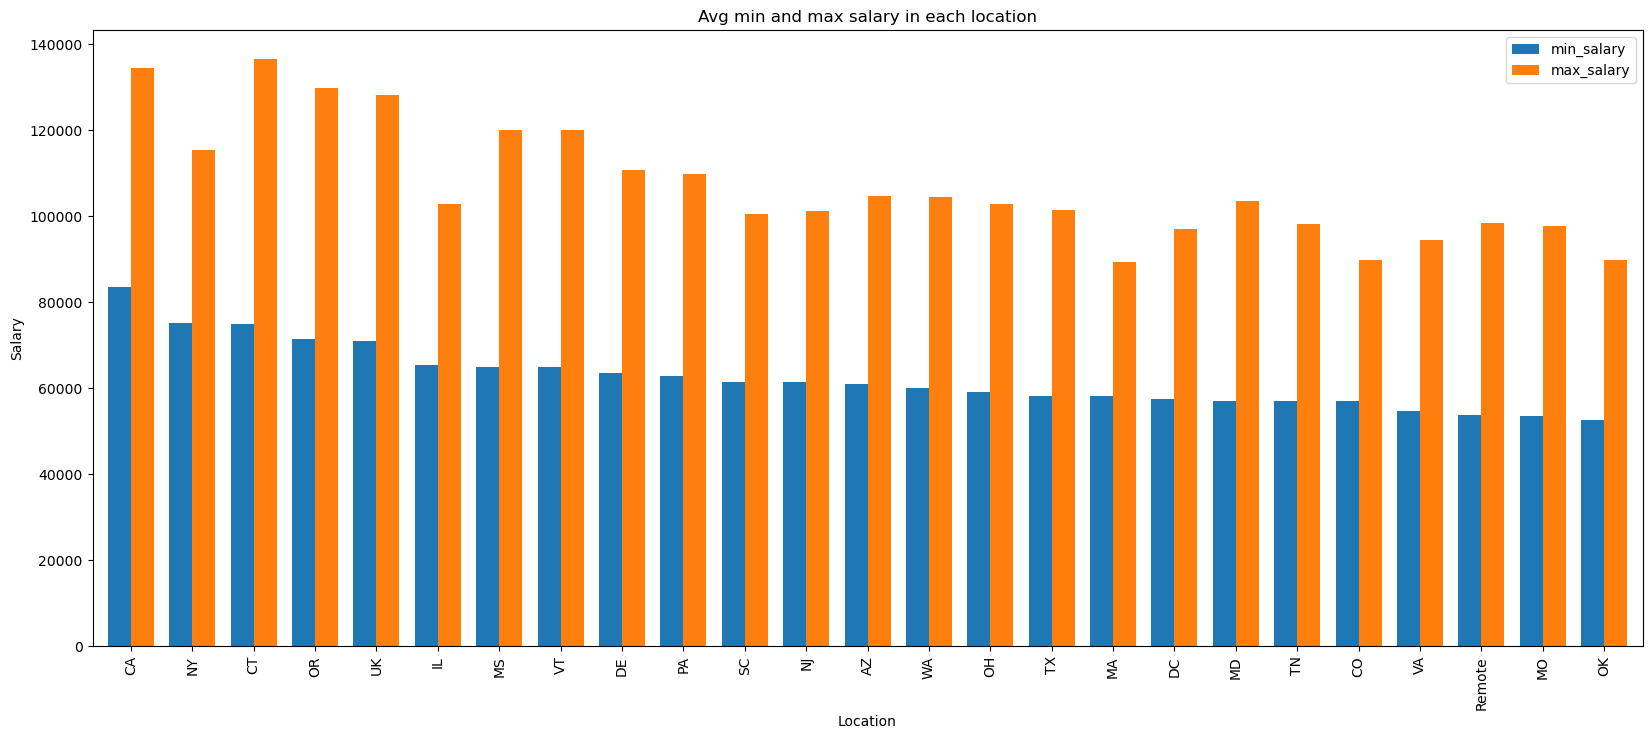

In [52]:
LocationVsSalary = data.groupby('Location')[['min_salary','max_salary']].mean().sort_values(['min_salary','max_salary'],ascending=False)[:25]
LocationVsSalary.plot(kind="bar", figsize=(20,8), width=0.75)
plt.ylabel("Salary")
plt.title("Avg min and max salary in each location")

### Correlation analysis between numerical features.

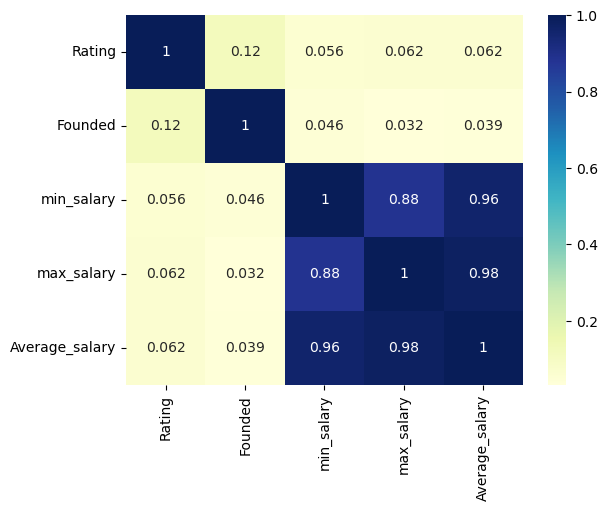

In [53]:
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

### Outliers analysis and handling.

In [54]:
# Extract only numerical values.
numerics = ['int','float']
numeric_data = data.select_dtypes(include=numerics)
numeric_data

print("Old shape after droping all outliers values in all numeric columns: ", data.shape)

Old shape after droping all outliers values in all numeric columns:  (16052, 16)


In [55]:
def check_and_handle_outliers(data):

    numerical_columns = list(data.select_dtypes(include=['int','float']))
    #We won't handle the outliers in the Rating column although we it doesn't has any outliers but it's the output column.
    numerical_columns.remove('Rating')
    #We will drop this column in the next lines of the code.
    numerical_columns.remove('Average_salary') 
    for i, column in enumerate(numerical_columns):
        
        Q1 = np.percentile(data[column], 25,
                        method = 'midpoint')
        
        Q3 = np.percentile(data[column], 75,
                        method = 'midpoint')
        IQR = Q3 - Q1
        
        # Upper bound
        upper_bound = np.where(data[column] > (Q3+1.5*IQR))
        # Lower bound
        lower_bound = np.where(data[column] < (Q1-1.5*IQR))

        num_of_outliers = len(upper_bound[0]) + len(lower_bound[0])
        
        print(f"number of outliers at '{column} feature is: {num_of_outliers} value.")

        ''' Removing the Outliers '''
        percentiles = data[column].quantile([0.25,0.75]).values
        data[column][data[column] < percentiles[0]] = percentiles[0]
        data[column][data[column] > percentiles[1]] = percentiles[1]

        plt.clf()
        data.reset_index(drop=True, inplace=True)    
    return data

[Text(0.5, 1.0, 'Founded feature with outliers')]

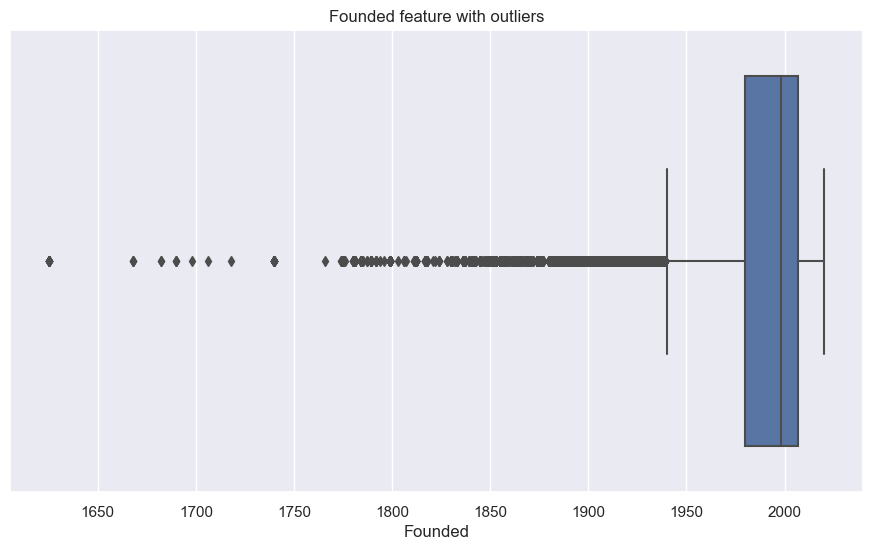

In [56]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11,6)})


founded_outlier = sns.boxplot(x=data["Founded"])
founded_outlier.set(title = "Founded feature with outliers")

In [57]:
data = check_and_handle_outliers(data)

number of outliers at 'Founded feature is: 1881 value.
number of outliers at 'min_salary feature is: 431 value.
number of outliers at 'max_salary feature is: 465 value.


<Figure size 1100x600 with 0 Axes>

[Text(0.5, 1.0, 'Founded feature without outliers')]

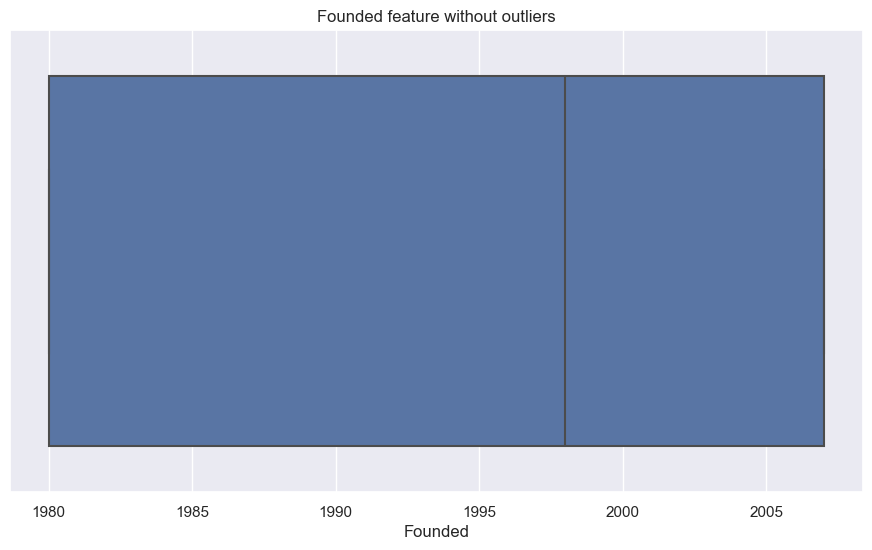

In [58]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11,6)})


founded_outlier = sns.boxplot(x=data["Founded"])
founded_outlier.set(title = "Founded feature without outliers")

### Hypothese testing.

H0: The companies that are newer have lower ratings with their jobs than older companies' jobs?

H1: The companies that are newer have higher ratings with their jobs than older companies' jobs?

In [59]:
new_1 = data.loc[(data['Founded']>=2001)]['Rating']
new_2 = data.loc[(data['Founded']<2001)]['Rating']

print(new_1.mean())
print(new_2.mean())

ttest,significance_level = ttest_ind(new_1,new_2,equal_var=False) #Assume samples have equal variance
print("p-value: ",significance_level)
print(f"t-test value: {ttest}")

if significance_level > 0.05:
  print("we accept null hypothesis")
else:
  print("we reject null hypothesis")

3.8946492356051103
3.6599303430507484
p-value:  4.946704108970071e-113
t-test value: 22.858364680587258
we reject null hypothesis


The test yields a p-value of 4.946704108970071e-113, which means there is a 4.946704108970071e-113% chance we'd see sample data this far apart if the two groups tested are actually identical. If we weren't using a 95% confidence level we would reject the null hypothesis, since the p-value is less than the corresponding significance level of 5%.


### Answer to the first question.
#### So, based on that test we see that it's not necessarily that newer companies' jobs have lower ratings and that's logical based on the mean values of newer companies' jobs ratings and older companies' jobs ratings.

### Average_salary feature has high correlation with min_salary and max_salary so I will drop it.

In [60]:
data = data.drop(['Average_salary'],axis=1)

In [61]:
data.columns

Index(['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Easy Apply', 'min_salary', 'max_salary'],
      dtype='object')

### Feature Engineering processes.



1. Feature Selection Process
    1. Drop Comptitors feature since most of it null values.
    2. Select the remaining features.
2. Handling Categorical Features
    1. convert datatype of Location, Headquarters, Type of ownership, Industry, Sector, Easy Apply , Job Title features from object to catrgorical and then convert them to one hot encoded features.
3. Handling Numerical Features
    1. Normalize Rating Founded, min_salary, max_salary features
4. Clean Job Description feature values and then vectorize them using either counter vectorizer ot TF-IDF vectorizer.
5. Use PCA technique to reduce the dimensions of the final dataset (optional step).